In [114]:
import pandas as pd
from sklearn.datasets import load_iris 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import tree
import matplotlib.pyplot as plt

In [115]:
iris = load_iris()

In [116]:
x =pd.DataFrame(iris.data , columns= iris.feature_names)
y = iris.target

In [117]:
df= x.copy()
df['label'] = y 

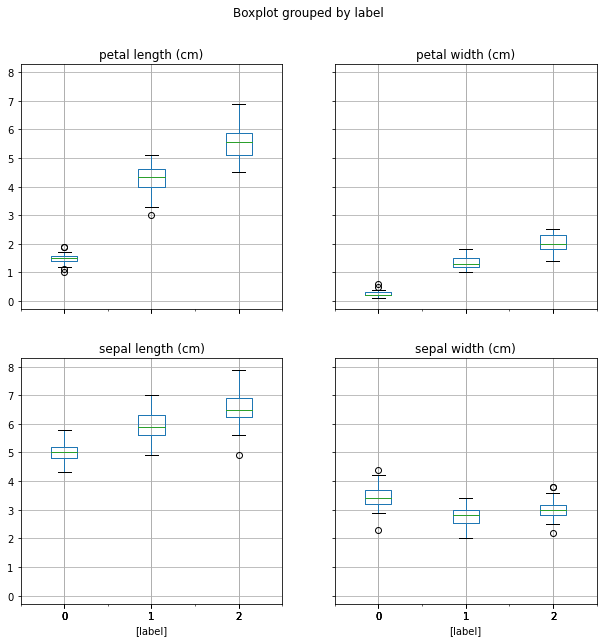

In [118]:

df.boxplot(by ='label', figsize=(10,10))
plt.show()

#### Preprocessing

In [119]:
## split data into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size= 0.3 , random_state= 505)

In [120]:
### normalize data because we are going to use knn classifier
norm = StandardScaler()
norm.fit(x_train)

StandardScaler()

In [121]:
x_train = pd.DataFrame(data = norm.transform(x_train) , columns= x.columns)
x_test = pd.DataFrame(data = norm.transform(x_test) , columns= x.columns)

#### Models

##### Decision Tree

In [122]:
treeModel = DecisionTreeClassifier()

In [123]:
treeModel.fit(x_train, y_train) #

DecisionTreeClassifier()

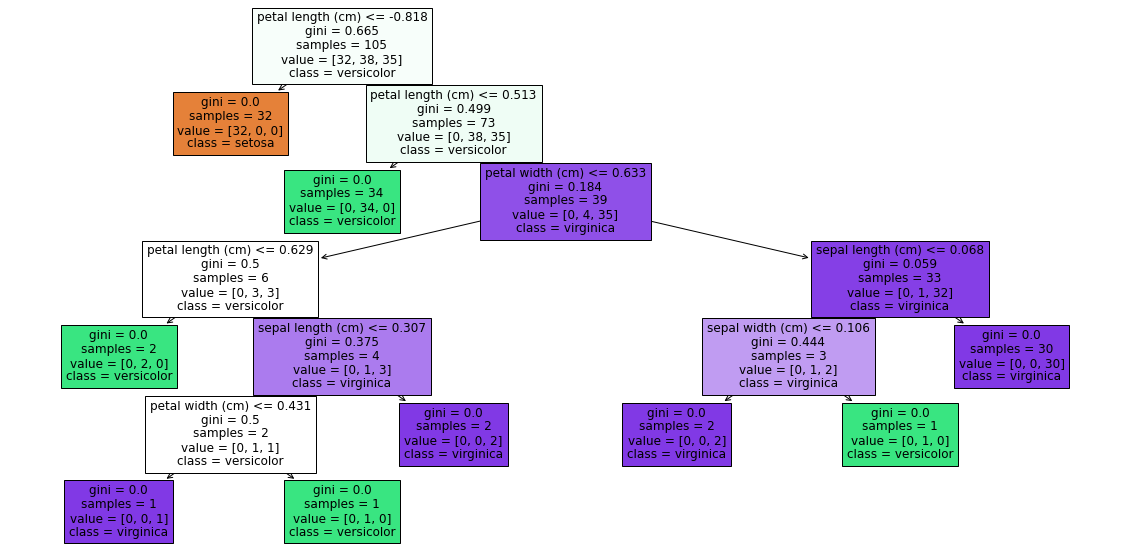

In [124]:
plt.figure(figsize = (20,10))
tree.plot_tree(treeModel,
                feature_names=iris.feature_names,
                class_names = iris.target_names,
                filled = True)
plt.show()

In [125]:
treeModel.score(x_test, y_test)

0.9555555555555556

In [126]:
cross_val_score(treeModel, x_train, y_train , cv = 20).mean()

0.9366666666666668

##### Random Forest

In [127]:
forest = RandomForestClassifier()

In [128]:
forest.fit(x_train, y_train)

RandomForestClassifier()

In [129]:
cross_val_score(forest, x_train, y_train , cv=20 ).mean()

0.945

##### Knn

In [132]:
knn = KNeighborsClassifier(n_neighbors=3)

In [133]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [138]:
knn.score(x_test, y_test)

0.9333333333333333

In [151]:
## creating a function to train and then return the accuracy for each value of k
def fncKNN(n):
    modeloKNN = KNeighborsClassifier(n_neighbors=n)
    modeloKNN.fit(x_train, y_train)
    ## Avaliando o modelo
    score = modeloKNN.score(x_test, y_test)
    return score

In [158]:
kvals = range(1,30,2)
acuracias = []

In [159]:
for k in kvals:
    result = fncKNN(k)
    acuracias.append([k,result])

In [160]:
acuracias = pd.DataFrame(acuracias, columns=['k' , 'score'])

In [161]:
acuracias

,k,score
0,1,0.844444
1,3,0.933333
2,5,0.933333
3,7,0.955556
4,9,0.955556
5,11,0.977778
6,13,0.955556
7,15,0.911111
8,17,0.933333
9,19,0.933333


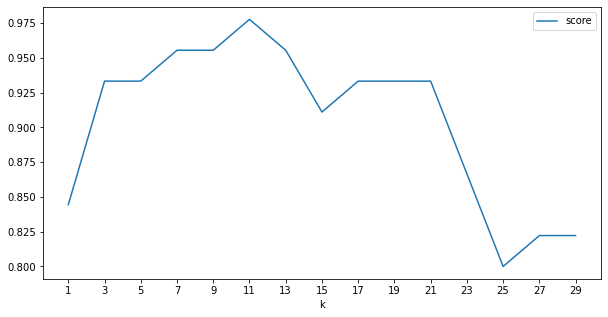

In [162]:
ax= acuracias.plot(x= 'k' , kind= 'line', figsize=(10,5))
plt.xticks(acuracias['k'])
plt.show()

In [163]:
knn = KNeighborsClassifier(n_neighbors=11)

In [164]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [165]:
knn.score(x_test, y_test)

0.9777777777777777

In [168]:
score = cross_val_score(knn, x_train, y_train, cv = 20)

In [169]:
score.mean()

0.9533333333333334